# Question - 01

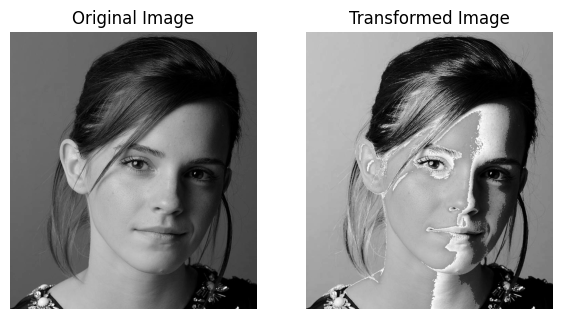

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the grayscale image
image = io.imread('./a1images/a1images/emma.jpg', as_gray=True)

image_scaled = (image * 255).astype(np.uint8)

def transform_intensity(I_in):
    if I_in < 50:
        return I_in
    elif I_in < 150:
        return 100 + (255-100)/(100) * (I_in-50)
    else:
        return I_in

# Aply the transformation
transformed_image = np.vectorize(transform_intensity)(image_scaled)

# Ensure the output intensities are within [0, 255]
transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

transformed_image_rescaled = transformed_image / 255.0
input_intensities = np.arange(0, 255)

# Apply transformation
output_intensities = np.array([transform_intensity(i) for i in input_intensities])


# Display the original and transformed images
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image_rescaled, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


# Question - 02

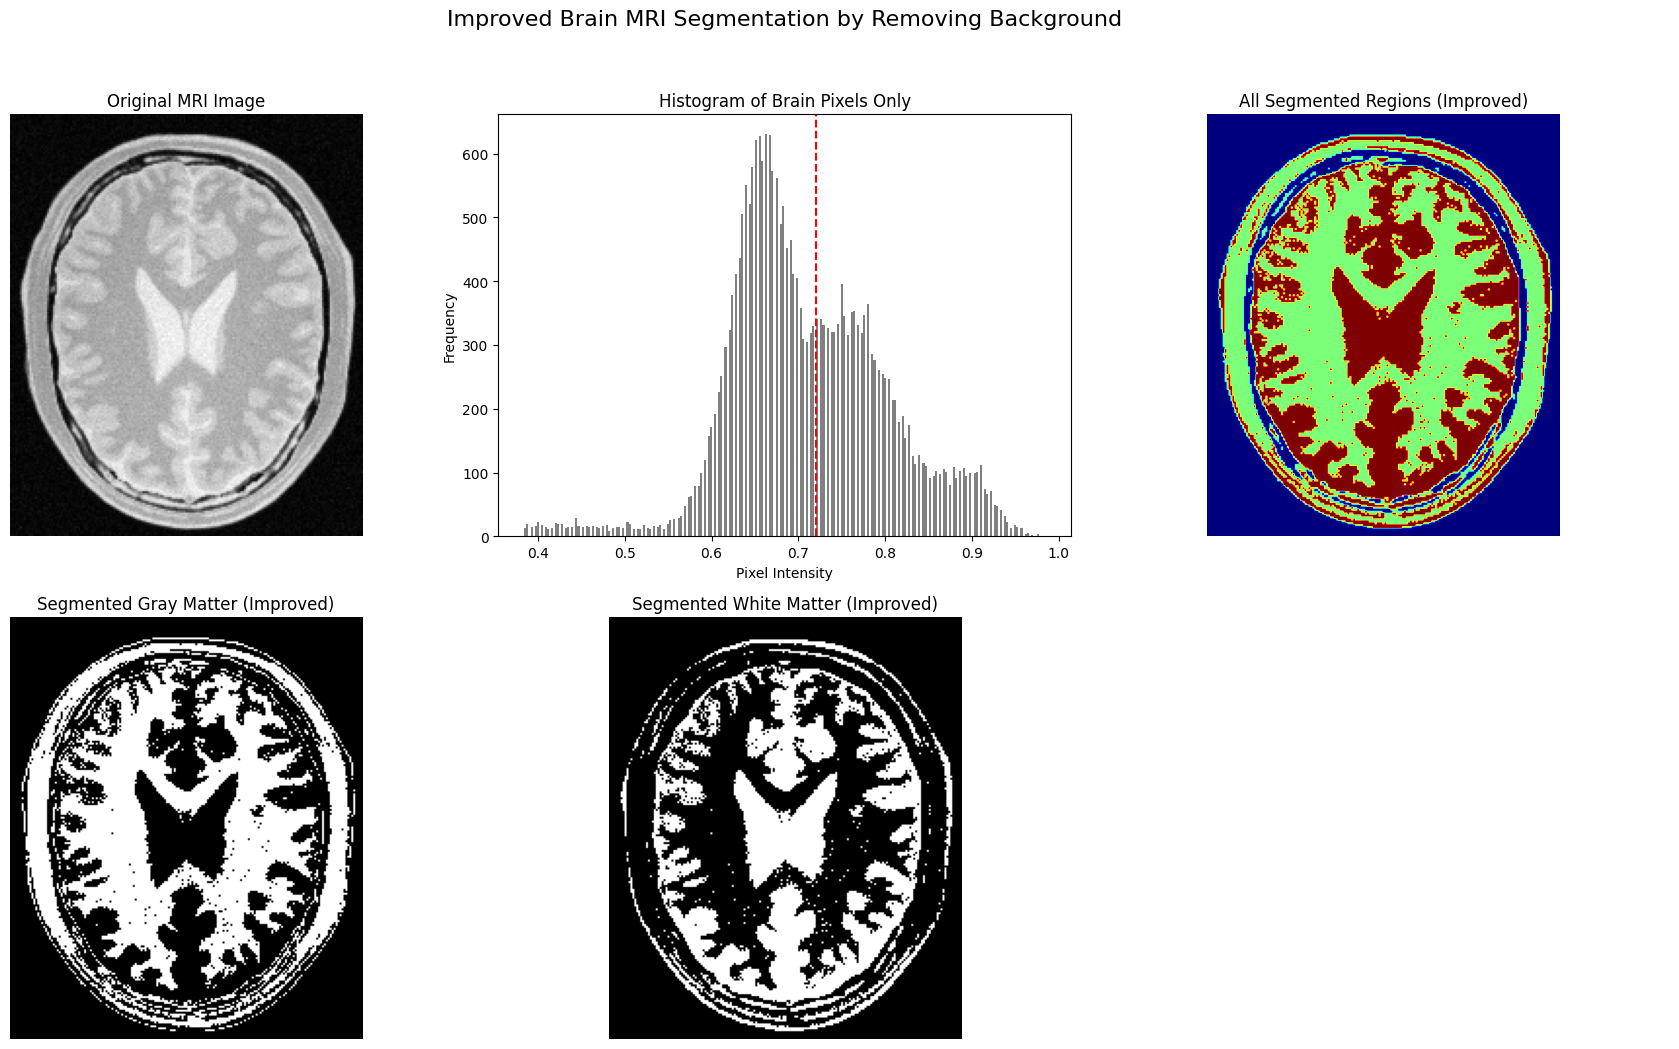

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_multiotsu, threshold_otsu


image = io.imread('./a1images/a1images/brain_proton_density_slice.png', as_gray=True)

initial_thresh = threshold_otsu(image)
brain_mask = image > initial_thresh

brain_pixels = image[brain_mask]
brain_thresholds = threshold_multiotsu(brain_pixels, classes=2)

regions = np.digitize(brain_pixels, bins=brain_thresholds) + 1

final_segmentation = np.zeros_like(image, dtype=np.uint8)
final_segmentation[brain_mask] = regions

gray_matter_mask = (final_segmentation == 1)
white_matter_mask = (final_segmentation == 2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 11))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original MRI Image')
ax[0, 0].axis('off')

ax[0, 1].hist(brain_pixels, bins=255, color='gray')
ax[0, 1].set_title('Histogram of Brain Pixels Only')
for thresh in brain_thresholds:
    ax[0, 1].axvline(thresh, color='r', linestyle='--')
ax[0, 1].set_xlabel('Pixel Intensity')
ax[0, 1].set_ylabel('Frequency')

ax[0, 2].imshow(final_segmentation, cmap='jet')
ax[0, 2].set_title('All Segmented Regions (Improved)')
ax[0, 2].axis('off')

ax[1, 0].imshow(gray_matter_mask, cmap='gray')
ax[1, 0].set_title('Segmented Gray Matter (Improved)')
ax[1, 0].axis('off')

ax[1, 1].imshow(white_matter_mask, cmap='gray')
ax[1, 1].set_title('Segmented White Matter (Improved)')
ax[1, 1].axis('off')

ax[1, 2].axis('off')

plt.suptitle('Improved Brain MRI Segmentation by Removing Background', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Question - 03